In [1]:
import numpy as np
# import numpy.linalg as la
# import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# import pandas as pd  
# import numpy as np  
# import matplotlib.pyplot as plt  
# import seaborn as seabornInstance 
# from sklearn.model_selection import train_test_split 
# from sklearn.linear_model import LinearRegression
# from sklearn import metrics

# from mpl_toolkits.mplot3d import Axes3D
# from matplotlib import cm
# from sklearn import datasets
# from sklearn.preprocessing import StandardScaler
# from sklearn.metrics import mean_squared_error

# from pandas.tools.plotting import table

%matplotlib inline

In [78]:
sns.set(rc={'figure.figsize':(8,4.5)})

In [24]:
airbnb_data_full = pd.read_csv('AB_NYC_2019.csv')

In [25]:
airbnb_data_full.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [26]:
airbnb_data_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [27]:
airbnb_data_full.isna().sum() 

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [28]:
airbnb_data_full.duplicated().sum()
# airbnb_data_full.drop_duplicates(inplace=True)

0

In [29]:
airbnb_data = airbnb_data_full.drop(['id','host_name','last_review'], axis=1)

In [30]:
airbnb_data.head(3)

,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Clean & quiet apt home by the park,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,Skylit Midtown Castle,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,THE VILLAGE OF HARLEM....NEW YORK !,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,1,365


In [31]:
# Missing values in percent
(airbnb_data.isna().sum() / airbnb_data.shape[0]) * 100

name                               0.032723
host_id                            0.000000
neighbourhood_group                0.000000
neighbourhood                      0.000000
latitude                           0.000000
longitude                          0.000000
room_type                          0.000000
price                              0.000000
minimum_nights                     0.000000
number_of_reviews                  0.000000
reviews_per_month                 20.558339
calculated_host_listings_count     0.000000
availability_365                   0.000000
dtype: float64

20% missing in reviews_per_month

In [32]:
airbnb_data.fillna({'reviews_per_month':0}, inplace=True)

In [33]:
airbnb_data.head(3)

,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Clean & quiet apt home by the park,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,Skylit Midtown Castle,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,THE VILLAGE OF HARLEM....NEW YORK !,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.00,1,365


In [34]:
airbnb_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   name                            48879 non-null  object 
 1   host_id                         48895 non-null  int64  
 2   neighbourhood_group             48895 non-null  object 
 3   neighbourhood                   48895 non-null  object 
 4   latitude                        48895 non-null  float64
 5   longitude                       48895 non-null  float64
 6   room_type                       48895 non-null  object 
 7   price                           48895 non-null  int64  
 8   minimum_nights                  48895 non-null  int64  
 9   number_of_reviews               48895 non-null  int64  
 10  reviews_per_month               48895 non-null  float64
 11  calculated_host_listings_count  48895 non-null  int64  
 12  availability_365                

In [35]:
for colname in airbnb_data.columns:
    print(f'{colname} : {len(airbnb_data[colname].unique())} unique values')

name : 47906 unique values
host_id : 37457 unique values
neighbourhood_group : 5 unique values
neighbourhood : 221 unique values
latitude : 19048 unique values
longitude : 14718 unique values
room_type : 3 unique values
price : 674 unique values
minimum_nights : 109 unique values
number_of_reviews : 394 unique values
reviews_per_month : 938 unique values
calculated_host_listings_count : 47 unique values
availability_365 : 366 unique values


Features "name", "neighbourhood_group", "neighbourhood" and "room_type" are object. 
Feature "neighbourhood_group" has 5 groups. Feature "room_type" has 3 types. Feature "name" should be dropped.

In [36]:
airbnb_data.drop(['name'], axis=1, inplace=True)

In [37]:
airbnb_data.head(3)

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.00,1,365


In [60]:
# Check
# airbnb_data_full.isna().sum()

In [38]:
airbnb_data.describe()

,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.090910,7.143982,112.781327
std,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.597283,32.952519,131.622289
min,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.040000,1.000000,0.000000
50%,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.370000,1.000000,45.000000
75%,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,1.580000,2.000000,227.000000
max,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


Price 0 and minimum_nights 1250 look strange

In [49]:
print(f'Shape before = {airbnb_data_full.shape}, shape now = {airbnb_data.shape}')

Shape before = (48895, 16), shape now = (48895, 12)


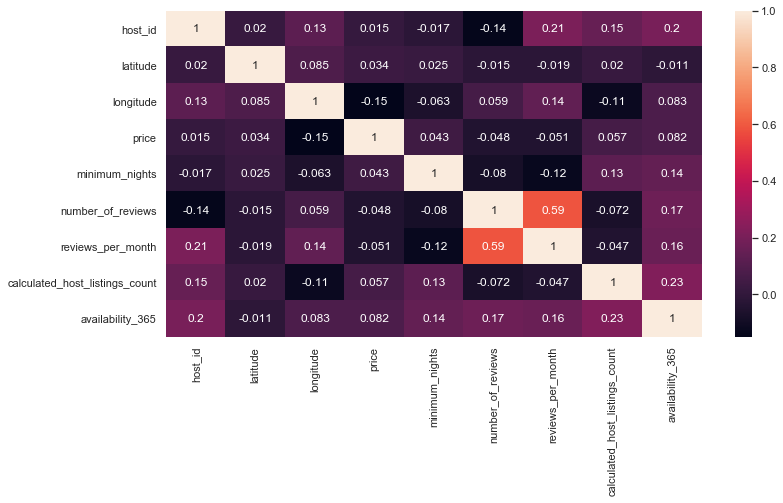

In [68]:
feature_correlation = airbnb_data.corr()
plt.figure(figsize=(12,6))
sns.heatmap(feature_correlation, annot=True)

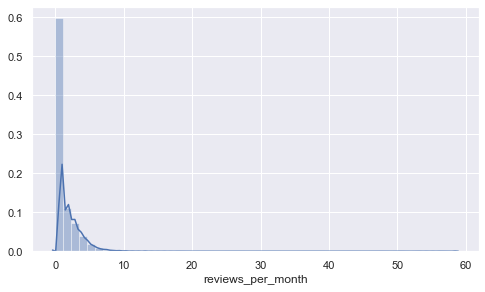

In [79]:
sns.distplot(airbnb_data.reviews_per_month)

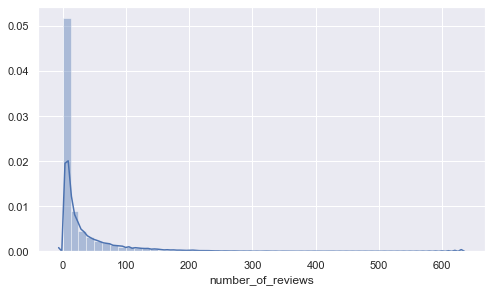

In [80]:
sns.distplot(airbnb_data.number_of_reviews)

Both grapics have not a normal distribution. => Choose the kendall corr

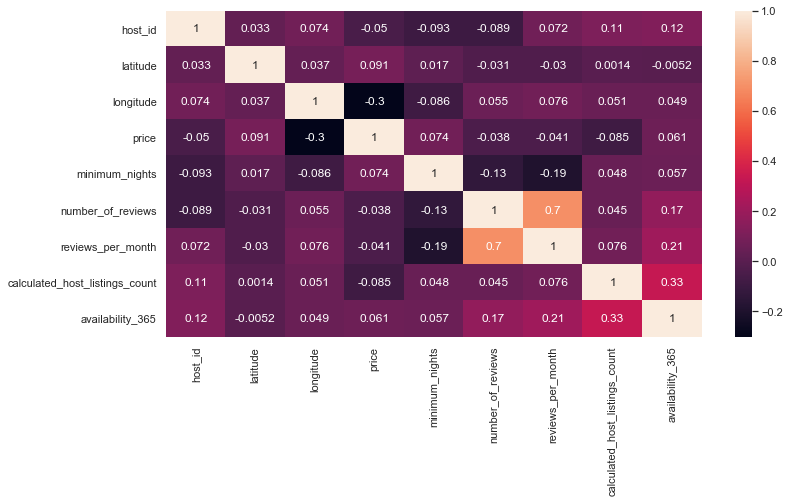

In [81]:
feature_correlation = airbnb_data.corr(method='kendall')
plt.figure(figsize=(12,6))
sns.heatmap(feature_correlation, annot=True)

Learn the features "neighbourhood_group", "neighbourhood" and "room_type" (object). 

Text(0.5, 1.0, 'Neighbourhood Group')

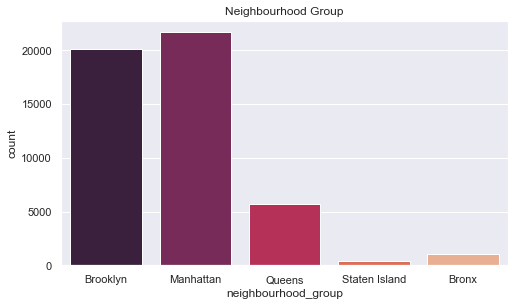

In [82]:
sns.countplot(airbnb_data['neighbourhood_group'], palette='rocket')
plt.title('Neighbourhood Group')

Text(0.5, 1.0, 'Neighbourhood')

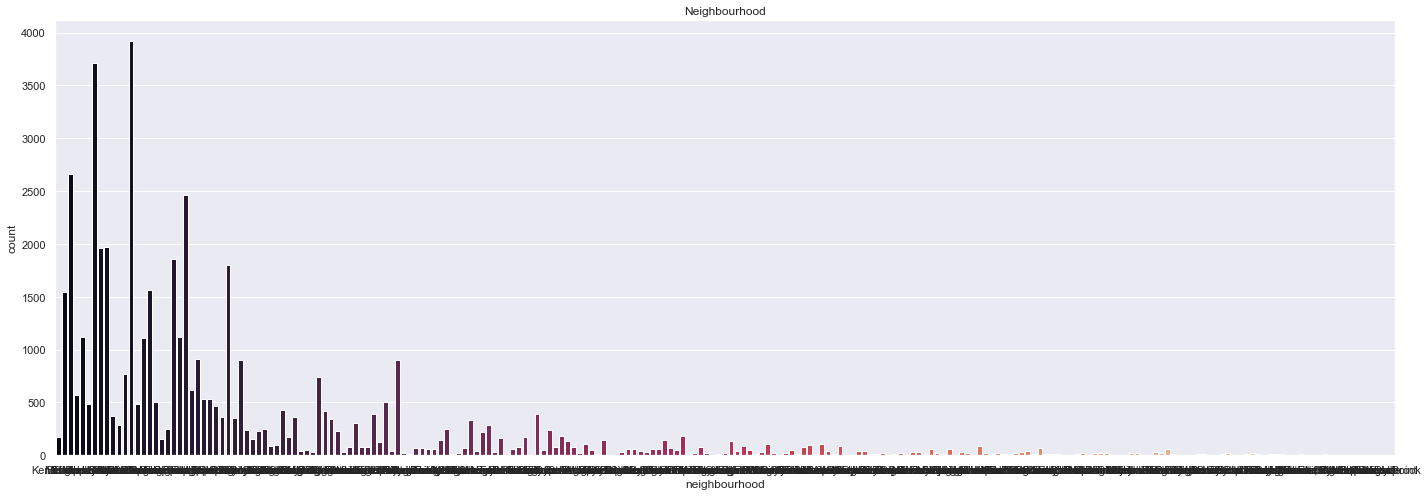

In [85]:
ax = sns.countplot(airbnb_data['neighbourhood'], palette='rocket')
fig = plt.gcf()
fig.set_size_inches(24,8)
plt.title('Neighbourhood')

Text(0.5, 1.0, 'Room type')

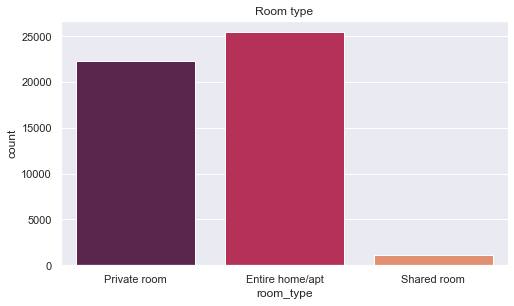

In [87]:
sns.countplot(airbnb_data['room_type'], palette="rocket")
plt.title('Room type')

In [94]:
# sns.boxplot(data=airbnb_data, x='neighbourhood_group',y='availability_365',palette='rocket')

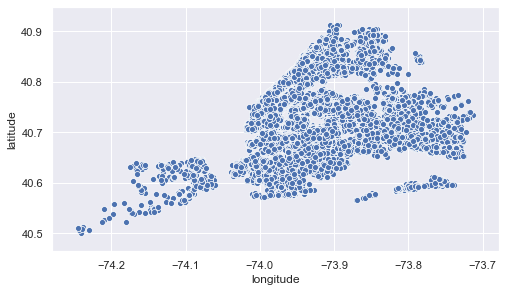

In [95]:
sns.scatterplot(airbnb_data.longitude, airbnb_data.latitude)
# sns.scatterplot(airbnb_data.longitude, airbnb_data.latitude, hue=airbnb_data.neighbourhood_group)

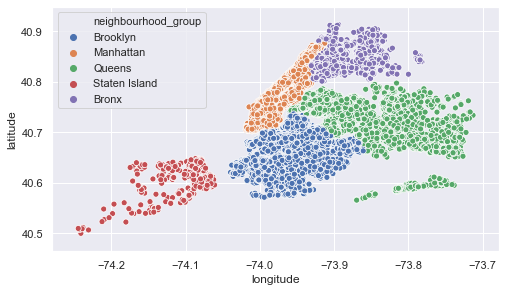

In [96]:
sns.scatterplot(airbnb_data.longitude, airbnb_data.latitude, hue=airbnb_data.neighbourhood_group)

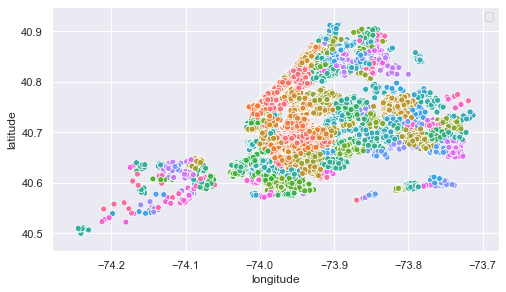

In [104]:
ax = sns.scatterplot(airbnb_data.longitude, airbnb_data.latitude, hue=airbnb_data.neighbourhood)
ax.legend([])

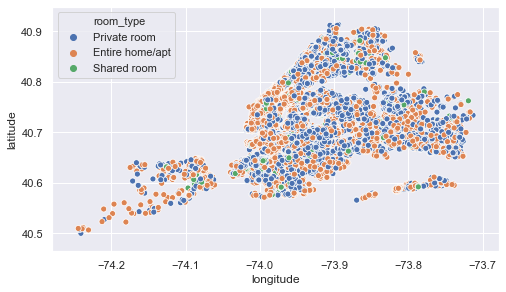

In [106]:
sns.scatterplot(airbnb_data.longitude, airbnb_data.latitude, hue=airbnb_data.room_type)